# Анализ данных в задаче кредитного скоринга

In [89]:
import numpy as np
import pandas as pd
import scipy as sc
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\user\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['pv']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [90]:
data = pd.read_csv("credit_card_default_analysis.csv")
print "Total number of records: ", len(data)
data.head()

Total number of records:  30000


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Далее заемщиков, вернувших кредит будем называть хорошими, а не вернувших - плохими

In [91]:
#Посмотрим на объемы групп
print data.default.value_counts()
# 
data.describe()

0    23364
1     6636
Name: default, dtype: int64


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,0.356767,0.320033,0.304067,0.258767,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,0.760594,0.801727,0.790589,0.761113,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### 1.a) Проверить гипотезу о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки

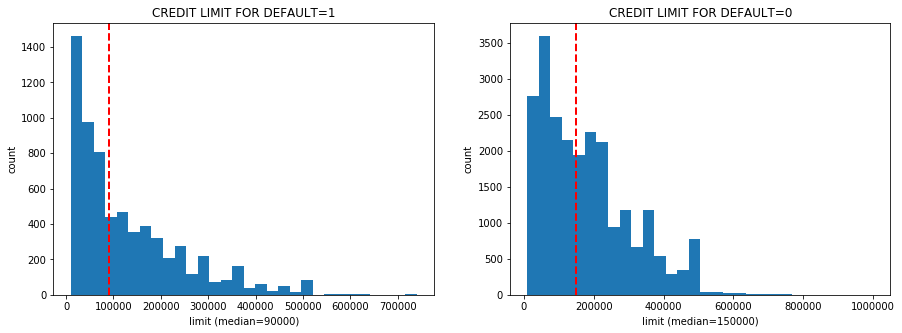

Median for DEFAULT=1: 90000.00
Median for DEFAULT=0: 150000.00


In [92]:
def1, def0 = data[data.default==1].LIMIT_BAL.values, data[data.default==0].LIMIT_BAL.values
med1, med0 = np.median(def1), np.median(def0)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(def1, bins=30)
plt.axvline(med1, color='r', linestyle='dashed', linewidth=2)
plt.xlabel("limit (median=%d)" % med1)
plt.ylabel("count")
plt.title("CREDIT LIMIT FOR DEFAULT=1")

plt.subplot(1,2,2)
plt.hist(def0, bins=30)
plt.xlabel("limit (median=%d)" % med0)
plt.ylabel("count")
plt.title("CREDIT LIMIT FOR DEFAULT=0")
plt.axvline(med0, color='r', linestyle='dashed', linewidth=2)

plt.show()

print "Median for DEFAULT=1: %.2f" % med1
print "Median for DEFAULT=0: %.2f" % med0

Распределения на графиках не похожи на нормальное и отличаются между собой, медианы также не равны.

$H_0$: медианы значений кредитного лимита совпадают для групп людей, вернувших кредит и невернувших кредит <br />
$H_1$: медианы значений кредитного лимита разлячаются для данных групп людей<br />

Будем проверять нашу гипотезу с использованием __bootstrap__

In [93]:
#нам понадобятся вспомогательные функции
def get_bootstrap_samples(data, n_samples):
    ind = np.random.randint(0, len(data), (n_samples, len(data)))
    return data[ind]
def stat_intervals(stat, alpha=0.05):
    return np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])

In [94]:
np.random.seed(0)
def0_btrs = get_bootstrap_samples(def0, 1000)
def1_btrs = get_bootstrap_samples(def1, 1000)

In [95]:
#map(np.median, def0_btrs) равносильно np.median(def0_btrs, axis=1)
print "95% confidence interval for Good clients:",  stat_intervals(map(np.median, def0_btrs))
print "95% confidence interval for Default clients:",  stat_intervals(map(np.median, def1_btrs))

95% confidence interval for Good clients: [ 150000.  150000.]
95% confidence interval for Default clients: [ 80000.  90000.]


In [96]:
#то же для средних
print "95% confidence interval for Good clients:",  stat_intervals(map(np.mean, def0_btrs))
print "95% confidence interval for Default clients:",  stat_intervals(map(np.mean, def1_btrs))

95% confidence interval for Good clients: [ 176255.2259887   179833.54947783]
95% confidence interval for Default clients: [ 127478.43158529  132814.89180229]


Доверительные интервалы для медиан не пересекаются. У хороших (возвращающих кредит) клиентов кредитный лимит больше. 
Оценим разность медиан. Точечная оценка:

In [97]:
print "Delta median", np.median(def0) - np.median(def1)

Delta median 60000.0


Интервальная оценка разности медиан:

In [98]:
median_scores = map(lambda x: x[0] - x[1], zip(map(np.median, def0_btrs), map(np.median, def1_btrs)))
print "95% confidence interval for difference median:",  stat_intervals(median_scores)

95% confidence interval for difference median: [ 60000.  70000.]


Гипотезу о равенстве медианных значений можно уверенно отвергнуть, поскольку полученный интервал не содержит "0"

### 1.б)  Проверка гипотезы о равенстве распределений с помощью перестановочного критерия

Перестановчный критерий для независимых выборок:

$H_0\colon F_{X_1}(x) = F_{X_2}(x)$

$H_1\colon F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta <\neq> 0$

В данном случае<br /> $H_0$: среднее значение кредитного лимита одинаково для вернувших и не вернувших кредит <br />
$H_1$: среднее значение отличается у этих двух группах.

In [99]:
print u"Средний кредит среди хороших клиентов: %.5f" %np.mean(def0)
print u"Средний кредит среди плохих клиентов: %.5f" %np.mean(def1)

Средний кредит среди хороших клиентов: 178099.72607
Средний кредит среди плохих клиентов: 130109.65642


In [100]:
def permutation_test_ind(sample1, sample2, max_permutations=None, alternative='two-sided'):
    ''' Перестановочный критерий (независимые выборки)
    параметры:
        sample1: выборка 1
        sample2: выборка 2
        max_combinations: количество перестановок, None - поумолчанию все возможные
        alternative: альтернатива ['two-sided', 'less', 'greater']
    return: достигаемый уровень значимости (p-value)
    '''

    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")

    t_stat = permutation_t_stat_ind(sample1, sample2)

    zero_distr = permutation_zero_dist_ind(sample1, sample2, max_permutations)

    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)


def get_random_combinations(n1, n2, max_combinations):
    index = list(range(n1 + n2))
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]


def permutation_zero_dist_ind(sample1, sample2, max_combinations=None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)

    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                   for index in itertools.combinations(range(n), n1)]

    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

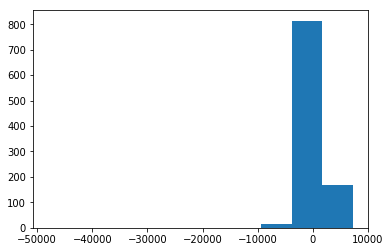

In [101]:
pylab.hist(permutation_zero_dist_ind(def1, def0, max_combinations = 1000))
pylab.show()

С некоторой погрешностью можно считать, что выполнено условие применимости перестановочного критерия - симметричность функции рапределения относительно математического ожидания

In [102]:
pv = permutation_test_ind(def1, def0, max_permutations=10000)
print u"Достигаемый уровень значимости перестановочного критерия: %.5f" % pv

Достигаемый уровень значимости перестановочного критерия: 0.00010


pvalue очень маленькое, на уровне значимости 0.05 нулевая гипотеза отвергается. Распределния не равны.
Результат имеет практическую значимость - клиенты, запрашивающие кредиты около 127-133 тыс. р. попадают в группу повышенного риска. Такие заявки требуют дополнительной проверки.

### 2. Проверка гипотезы о том, что гендерный состав группы людей вернувших и не вернувших кредит отличается

In [103]:
print u"Таблица сопряженности:"
table_sex = data.pivot_table(index='default', 
     values="LIMIT_BAL", columns='SEX', aggfunc = len, fill_value=0)
table_sex

Таблица сопряженности:


SEX,1,2
default,,
0,9015,14349
1,2873,3763


In [104]:
data.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

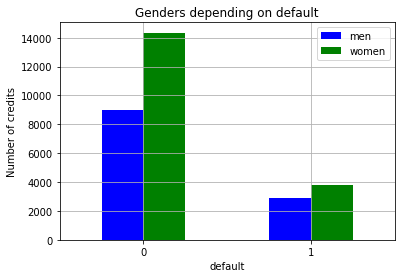

In [105]:
table_sex.plot.bar(color='bg', rot=0)
plt.xlabel("default")
plt.ylabel("Number of credits")
plt.title("Genders depending on default")
plt.legend(["men", "women"])
plt.grid()

plt.show()

Проверим гипотезу о совпадении гендерного состава в обоих выборках. Предполагаем, что выборки имеют распределения Бернулли с распределениями $Ber(p_{1})$ и $Ber(p_{2})$.

$H_{0} \colon p_{1} = p_{2}$

$H_{1} \colon p_{1} < \neq > p_{2}$

В данном случае <br />
$H_0$: гендерный состав одинаков для групп людей, вернувших и не вернувших кредит <br />
$H_1$: гендерный состав этих групп различается

In [106]:
def0_sex, def1_sex = data[data['default'] == 0]['SEX'], data[data['default'] == 1]['SEX']  

Будем проверять гипотезы с помощью доверительного интервала для разности долей

In [107]:
def proportions_diff_confint_ind(sample1, sample2, alpha=0.05):
    ''' Доверительный интервал для разности долей (независимые выборки)
    параметры
        sample1: выборка 1 с бинарными значениями [0, 1]
        sample2: выборка 2 с бинарными значениями [0, 1]
        alpha: уровень доверия
    return: доверительный интервал для разности долей (левая_граница, правая_граница)
    '''
    z = stats.norm.ppf(1 - alpha / 2.)
    p1, p2 = float(sum(sample1)) / len(sample1), float(sum(sample2)) / len(sample2)

    left_boundary = (p1 - p2) - z * np.sqrt(
        p1 * (1 - p1) / len(sample1) + p2 * (1 - p2) / len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(
        p1 * (1 - p1) / len(sample1) + p2 * (1 - p2) / len(sample2))

    return (left_boundary, right_boundary)

In [108]:
interval = proportions_diff_confint_ind(list(map(lambda x: 0 if x == 2 else x, def0_sex)),
                                        list(map(lambda x: 0 if x == 2 else x, def1_sex)))
print "95% confidence interval for difference between proportions:",  "[%.4f], [%.4f]" % (interval[0], interval[1])

95% confidence interval for difference between proportions: [-0.0605], [-0.0336]


In [109]:
odds_ratio, pv = stats.fisher_exact(table_sex.values, alternative='two-sided')
print "Odds ratio: %.2f" % odds_ratio
print "P-value: %s" % pv

Odds ratio: 0.82
P-value: 5.25283805205e-12


Нулевая гипотеза отвергается. Гендерный состав двух групп отличается, результат имеет практическую значимость - среди не вернувших кредит доля заёмщиков-мужчин больше, чем среди вернувших.

### 3. Образование (EDUCATION): проверка гипотезы о том, что образование не влияет на то, вернет ли человек долг

In [110]:
table_edu = data.pivot_table(index='default', 
     values="LIMIT_BAL", columns='EDUCATION', aggfunc = len, fill_value=0)
print table_edu
t_edu = data.EDUCATION.value_counts()
print "    Total  %d %d  %d  %d  %d  %d  %d" %(t_edu[0], t_edu[1], t_edu[2], t_edu[3], t_edu[4], t_edu[5], t_edu[6])

EDUCATION   0     1      2     3    4    5   6
default                                       
0          14  8549  10700  3680  116  262  43
1           0  2036   3330  1237    7   18   8
    Total  14 10585  14030  4917  123  280  51


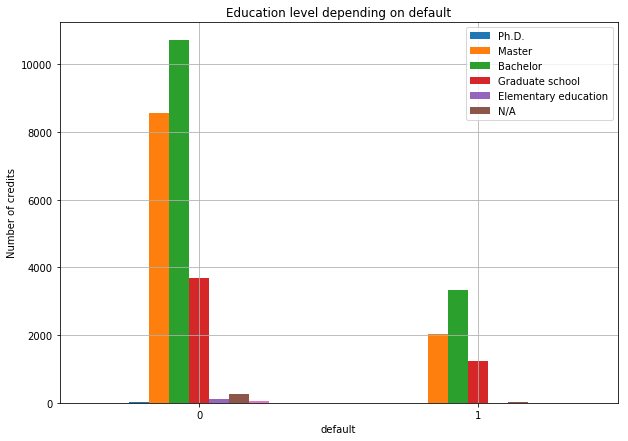

In [111]:
def0_edu, def1_edu = data[data.default==0].EDUCATION.values, data[data.default==1].EDUCATION.values
edu = ["Ph.D.", "Master", "Bachelor", "Graduate school", "Elementary education", "N/A"]
table_edu.plot.bar(rot=0, figsize=(10, 7))
plt.xlabel("default")
plt.ylabel("Number of credits")
plt.title("Education level depending on default")
plt.legend(edu)
plt.grid()
plt.show()

Проверим гипотезу с помощью критерия хи-квадрат.

Убедимся в правомерности применения статистики хи-квадрат в соответствии с правилами:
* число объектов в таблице сопряжённости $$n \geq 40$$
* ожидаемое число элементов в таблице $${n_{i+} n_{+j} \over n} < 5 \text{ не более, чем в 20% случаев}$$

In [112]:
table_edu

EDUCATION,0,1,2,3,4,5,6
default,,,,,,,
0,14,8549,10700,3680,116,262,43
1,0,2036,3330,1237,7,18,8


In [113]:
n  = np.sum(np.array(table_edu))
nw = table_edu.shape[0] * table_edu.shape[1] #число ячеек
ni = np.sum(table_edu, axis= 0) #массив сумм по столбцам
nj = np.sum(table_edu, axis= 1) #массив сумма по строкам
n5 = n*5
count = 0
for i in ni:
    for j in nj:
        if i*j < n5:
            count +=1

print u'Число объектов в таблице:', n
print u'Доля ячеек, удовлетворяющих неравенству (n_i+)(n_+j)/n < 5:', float(count/nw)

Число объектов в таблице: 30000
Доля ячеек, удовлетворяющих неравенству (n_i+)(n_+j)/n < 5: 0.0


статистики хи-квадрат применима

$H_0$: уровень образования не влияет на возврат кредита <br />
$H_1$: влияет

In [114]:
chi2, pval, dof, ex = stats.chi2_contingency(table_edu.values)
print "chi2 contingency: %.4f, p-value: %s" % (chi2, pval)

chi2 contingency: 163.2166, p-value: 1.23326262454e-32


Нулевая гипотеза отвергается на уровне значимости 0.05 

Визуализируем разницу в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг

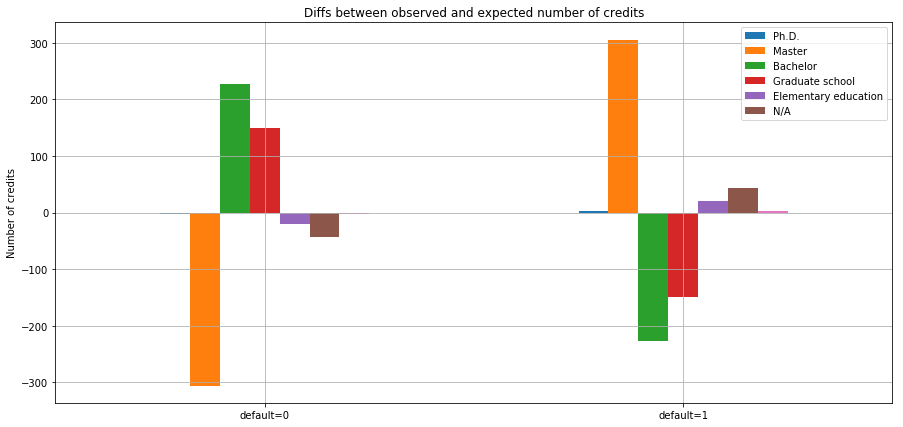

In [115]:
table_diff_edu1 = pd.DataFrame(data=ex-table_edu.values, columns=table_edu.columns)
table_diff_edu1.rename(index={0: "default=0", 1: "default=1"}, inplace=True)

table_diff_edu1.plot.bar(rot=0, figsize=(15, 7))
plt.ylabel("Number of credits")
plt.title("Diffs between observed and expected number of credits")
plt.legend(edu)
plt.grid()
plt.show()

Значения очень похожи - они зеркально противоположны.

Визуализируем разность между количеством человек вернувших и не вернувших долг по каждому из значений образования

C:\Users\user\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


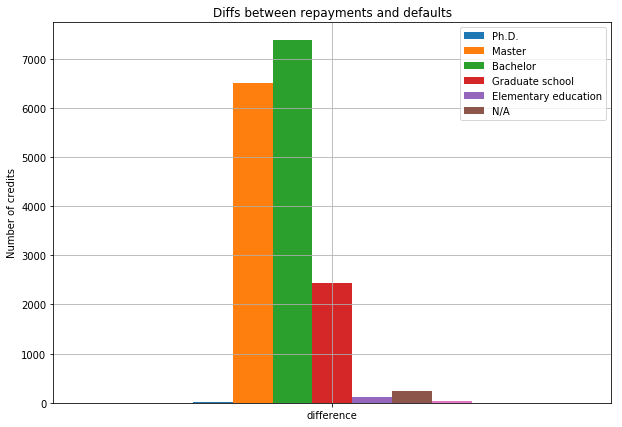

In [116]:
table_diff_edu2 = pd.DataFrame(data=(table_edu.loc[0] - table_edu.loc[1]).reshape(1,7),
                               columns=table_edu.columns, index = ["difference"])

table_diff_edu2.plot.bar(rot=0, figsize=(10, 7))
plt.ylabel("Number of credits")
plt.title("Diffs between repayments and defaults")
plt.legend(edu)
plt.grid()
plt.show()

Приведем значения ячеек к одному масштабу, разделив каждое значение разности на количество людей в этой подгруппе. Чем больше полученное значение, тем больше доля людей в этой группе, которые вернули кредит.

C:\Users\user\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


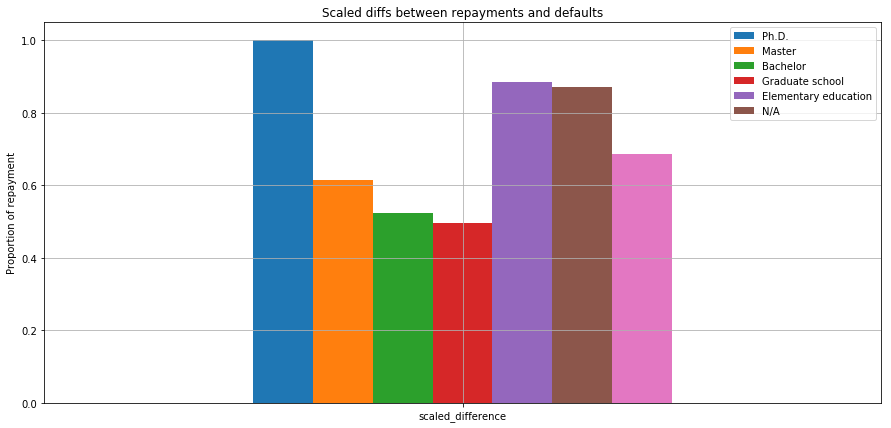

In [117]:
diff_edu2_scaled = (table_edu.loc[0] - table_edu.loc[1]) / ((table_edu.loc[0] + table_edu.loc[1]))
table_diff_edu2_scaled = pd.DataFrame(data=diff_edu2_scaled.reshape(1,7),
                                      columns=table_edu.columns, index = ["scaled_difference"])

table_diff_edu2_scaled.plot.bar(rot=0, figsize=(15, 7))
plt.ylabel("Proportion of repayment")
plt.title("Scaled diffs between repayments and defaults")
plt.legend(edu)
plt.grid()
plt.show()

Хуже всего возвращают кредиты люди с образованием "выпускник школы" и "бакалавр", лучше всего - доктора и магистры.

### 4. Семейное положение (MARRIAGE): Проверка, как связан семейный статус с индикатором дефолта

MARRIAGE   0      1      2    3
default                        
0         49  10453  12623  239
1          5   3206   3341   84
   Total  54  13659  15964  323


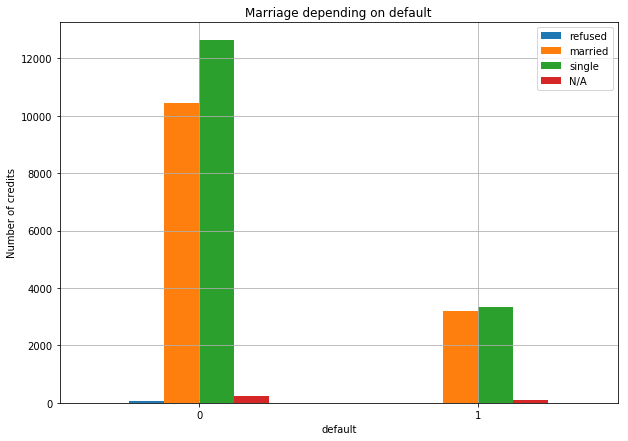

In [118]:
table_mar = data.pivot_table(index='default', 
     values="LIMIT_BAL", columns='MARRIAGE', aggfunc = len, fill_value=0)
print table_mar
mar = ["refused", "married", "single", "N/A"]
t_mar = data.MARRIAGE.value_counts()
print "   Total  %d  %d  %d  %d" %(t_mar[0], t_mar[1], t_mar[2], t_mar[3])
table_mar.plot.bar(rot=0, figsize=(10, 7))
plt.xlabel("default")
plt.ylabel("Number of credits")
plt.title("Marriage depending on default")
plt.legend(mar)
plt.grid()
plt.show()

Посчитаем коэффициент V Крамера, предварительно проверив применимость критерия хи-квадрат

In [120]:
n  = np.sum(np.array(table_mar))
nw = table_mar.shape[0] * table_mar.shape[1] #число ячеек
ni = np.sum(table_mar, axis= 0) #массив сумм по столбцам
nj = np.sum(table_mar, axis= 1) #массив сумма по строкам
n5 = n*5
count = 0.
for i in ni:
    for j in nj:
        if i*j < n5:
            count +=1

print u'Число объектов в таблице:', n
print u'Доля ячеек, удовлетворяющих неравенству (n_i+)(n_+j)/n < 5:', float(count/nw)

Число объектов в таблице: 30000
Доля ячеек, удовлетворяющих неравенству (n_i+)(n_+j)/n < 5: 0.0


статистики хи-квадрат применима

In [121]:
chi2, pv, dof, exp = stats.chi2_contingency(table_mar)
n = table_mar.sum(axis = 0).sum()
cr_v = (chi2 / n) ** 0.5

print 'Cramer\'s V = %.4f' % cr_v
print 'p-value = ', pv

Cramer's V = 0.0345
p-value =  8.82586245758e-08


По значению p-value отвергаем нулевую гипотезу. 
Исходя из значения коэффициента Крамера, корреляция не очень значительна.
На уровне значимости 0.05 семейное положение заёмщика не влияет на возврат или неозврат им кредита.

### 5а. Проверка гипотезы о равенстве медианных значений возрастов людей,  вернувших и не вернувших кредит 

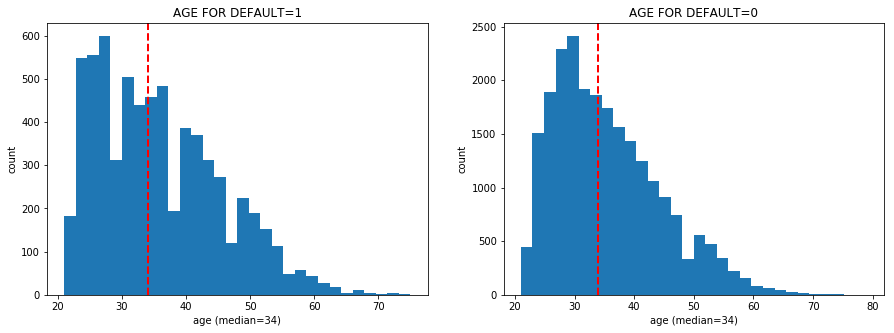

Median for DEFAULT=1: 34.00
Median for DEFAULT=0: 34.00


In [122]:
def0_age, def1_age = data[data['default'] == 0].AGE.values, data[data['default'] == 1].AGE.values
def0_age_median, def1_age_median = np.median(def0_age), np.median(def1_age)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(def1_age, bins=30)
plt.axvline(def1_age_median, color='r', linestyle='dashed', linewidth=2)
plt.xlabel("age (median=%d)" % def1_age_median)
plt.ylabel("count")
plt.title("AGE FOR DEFAULT=1")

plt.subplot(1,2,2)
plt.hist(def0_age, bins=30)
plt.xlabel("age (median=%d)" % def0_age_median)
plt.ylabel("count")
plt.title("AGE FOR DEFAULT=0")
plt.axvline(def0_age_median, color='r', linestyle='dashed', linewidth=2)

plt.show()

print "Median for DEFAULT=1: %.2f" % def1_age_median
print "Median for DEFAULT=0: %.2f" % def0_age_median

Из графика видно, что распределения не похожи на нормальные.

$H_0$: медианы значений возрастов совпадают для групп людей, вернувших кредит и невернувших кредит <br />
$H_1$: медианы значений возрастов разлячаются для данных групп людей<br />


In [123]:
#np.random.seed(0)
def0_median_scores = map(np.median,get_bootstrap_samples(def0_age, 1000))
def1_median_scores = map(np.median,get_bootstrap_samples(def1_age, 1000))
print "95% confidence interval for Good    clients:",  stat_intervals(def0_median_scores)
print "95% confidence interval for Default clients:",  stat_intervals(def1_median_scores)

95% confidence interval for Good    clients: [ 34.  34.]
95% confidence interval for Default clients: [ 34.  35.]


Доверительные интервалы имеют пересечение. Построим доверительный интервал для разности медиан.

In [124]:
stat_intervals(np.array(def0_median_scores) - np.array(def1_median_scores))

array([-1.,  0.])

Доверительный интервал содержит ноль, отсюда нельзя сделать вывод, что медианы значимо отличаются. 

Применим Критерий __Манна-Уитни__ для проверки равенства средних возрастов для групп людей, вернувших кредит и невернувших кредит:

- $H_0$: средние значения возрастов совпадают для групп людей, вернувших кредит и невернувших кредит 
- $H_1$: средние значения возрастов  возрастов разлячаются для данных групп людей<br />

In [125]:
stats.mannwhitneyu(def1_age, def0_age)

MannwhitneyuResult(statistic=76966879.5, pvalue=0.18625177174493079)

Значение p-value довольно большое и не позволяет нам отклонить нулевую гипотезу о равенстве средних.

Возраст не значим для данной скоринговой модели.